Chapter 1: Using Neural Nets to Recognize Handwritten Digits
-------------------------------------------------------------

Notebook to accompany lecture on Chapter 1 of Michael Nielsen's online Open Source book 
["Neural Networks and Deep Learning"](http://neuralnetworksanddeeplearning.com/chap1.html)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

Perceptrons
-----------

A perceptron takes several binary inputs, $x_1, x_2, ...,$ and produces a single binary output:

<img src="files/figures/perceptron.png">

A perceptron also has a set of real valued weights, $w_1, w_2, ...,$, one weight for each input.  The neuron's output,
0 or 1, is determined by whether the weighted sum $\sum_j w_j x_j$ is less than or greater than some *threshold value*.
The weight is also a real number which is a parameter of the neuron.


$$
\text{output} = \begin{cases}
    0 & \displaystyle \text{if} \quad \sum_j w_j x_j \le \text{threshold} \\
    1 & \text{if} \quad \sum_j w_j x_j > \text{threshold}  \\
\end{cases}
$$

This is the basic mathematical model of a perceptron unit.  These units can make a hard (yes/no or true/false) decision by
weighing up evidence (the weighted sum).

The  "should I go to the cheese festival" example could be coded in Python like this:

In [2]:
# x_1 = weather good, x_2 = boyfriend/girlfriend will accompany, x_3 = near public transit
x = np.array([0, 1, 1])

# w_1, w_2, w_3, the weighting factors we will apply to the x_1, x_2 and x_3 input factors
w = np.array([6, 2, 2])

# the decision threshold to use for our perceptron unit
threshold = 5

print x * w
print np.sum(x*w)
print np.sum(x*w) > threshold

[0 2 2]
4
False


In [3]:
# print table of all results for all combinations of inputs
from itertools import product
for x in product([0, 1], repeat=3):
    print x, np.sum(x*w), np.sum(x*w) > threshold

(0, 0, 0) 0 False
(0, 0, 1) 2 False
(0, 1, 0) 2 False
(0, 1, 1) 4 False
(1, 0, 0) 6 True
(1, 0, 1) 8 True
(1, 1, 0) 8 True
(1, 1, 1) 10 True


Of course, a single weighted decision like this will not be able to decide anything too complex (unless you rig it by choosing
complex inputs, but more on that later).  But, if we combine perceptron units into networks (the networks part of neural networks),
then it should seem plausible that a more complex network of units could make quite subtle decisions:

<img src="files/figures/perceptron-network.png">

In this network the columns of perceptrons are referred to as layers.  How many layers does this network have?  Since no unit
in a higher layer (to the right) connects to other units in the same layer, or to units in a previous layer, this is an example
of a strictly feed forward network.

We can think of the first layer as making three very simple decisions (by weighing the evidence of our original inputs). Then
the second layer can be though of as making 4 more subtle decisions, based on the simple decisions made by layer 1, etc.


Changing Notation
------------------

The dot product of 2 vectors is defined from linear algebra as:

$w = [w_1, w_2, ... w_n]$

$x = [x_1, x_2, ... x_n]$

$\displaystyle w \cdot x = \sum_i w_i x_i$

i.e. The dot product is the same as doing the scalar multiplication and the sum at the same time.  So we could use the 
~numpy~ ~dot()~ product function as shorthand for any weighted sum of a set of inputs with a set of weights (in fact when
I read such notation, I just mentally translate it as weighted sum).



In [4]:
# x_1 = weather good, x_2 = boyfriend/girlfriend will accompany, x_3 = near public transit
x = np.array([0, 1, 1])

# w_1, w_2, w_3, the weighting factors we will apply to the x_1, x_2 and x_3 input factors
w = np.array([6, 2, 2])

print np.sum(x * w)
print np.dot(x, w)

4
4


The other change is to move the threshold into the equation for determining if the perceptron fires or not.  Why we might want to
do this will become clearer later.  But it is equivalent to define the *bias* as $b \equiv -\text{threshold}$, and rewrite
the simple perceptron unit rule as:

$$
\text{output} = \begin{cases}
    0 & \displaystyle \text{if} \quad w \cdot x + b \le 0 \\
    1 & \text{if} \quad w \cdot x + b > 0  \\
\end{cases}
$$

Applying these as before, we have:

In [5]:
# x_1 = weather good, x_2 = boyfriend/girlfriend will accompany, x_3 = near public transit
x = np.array([0, 1, 1])

# w_1, w_2, w_3, the weighting factors we will apply to the x_1, x_2 and x_3 input factors
w = np.array([6, 2, 2])

# the perceptron bias, equivalent to the negative of the threshold from before
b = -5

print np.dot(x, w) + b
print np.dot(x, w) + b > 0

-1
False


In [6]:
# print table of all results for all combinations of inputs
from itertools import product
for x in product([0, 1], repeat=3):
    print x, np.dot(x, w) + b, np.dot(x, w) + b > 0

(0, 0, 0) -5 False
(0, 0, 1) -3 False
(0, 1, 0) -3 False
(0, 1, 1) -1 False
(1, 0, 0) 1 True
(1, 0, 1) 3 True
(1, 1, 0) 3 True
(1, 1, 1) 5 True


You can think of the bias as a measure of how easy it is to get the perceptron to output a 1.

Perceptrons to Implement Elementry Logic
-----------------------------------------

The NAND gate:  (And since NAND gate is known to be universal, we can use this basic unit to compute any boolean logic
circuit/expression)

In [7]:
w = np.array([-2, -2])
b = 3

# all combinations of 2 binary inputs
from itertools import product
for x in product([0, 1], repeat=2):
    print x, np.dot(x, w) + b, np.dot(x, w) + b > 0


(0, 0) 3 True
(0, 1) 1 True
(1, 0) 1 True
(1, 1) -1 False


**Exercise 1**: You can use a NAND gate to implement a NOT logic. As an electrical circuit, NAND to implement NOT looks like:

<img src="files/figures/not-gate-from-nand.png">

Implement a not gate by hand using the previous NAND gate.  HINT: You can simulate the doubling of the input by simply multiplying
the incoming weight by 2.

Sigmoid Neurons
---------------

The discussion at the start here is one good reason why we need to use a sigmoidal activation function.  The sigmoid function
is a smooth function (rather than making a hard decision like the simple Perceptron).  The hard decision of the simple
perceptron makes the output function of that unit non-differentiable at the location of the decision threshold.
The sigmoid neuron, on the other hand, can be differentiated over the whole range of the function.  As discussed in the text
this leads to the property that any small change in weight will cause only a small change in the output.

Sigmoid units are no longer binary, they use inputs (and biases) and produce outputs that are real valued numbers.  We still do
the same weighted sum (but now with real valued inputs) as before:

$\displaystyle z = \sum_j w_j x_j + b$

But we then transform the result of that sum with the sigmoid function, like this:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

As discussed in the book, we can use other activation functions than the sigmoid.  For example, we could define a hard
decision step function, and then use either one with the same weighted sum of inputs.  Here we recreate the figures
of the sigmoid and step functions using this method.

[-5.0, 5.0, -0.05, 1.05]

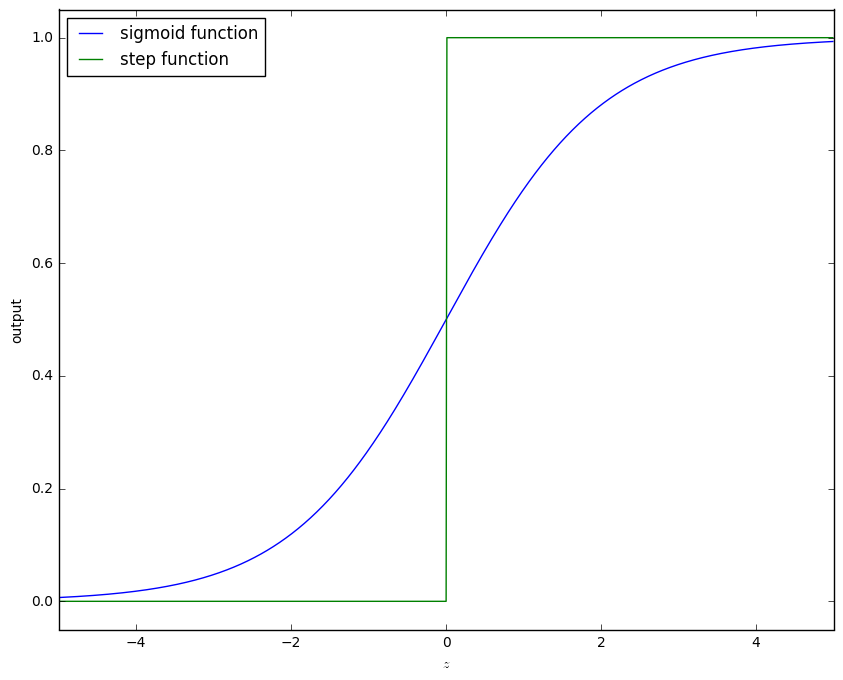

In [8]:
def sigmoid(z):
    """Implement the sigmoid activation function for neural units"""
    return 1.0 / (1.0 + np.exp(-z))

def step(z):
    """Implement the step function for neural units"""
    return np.where(z <= 0, 0, 1)


plt.figure(figsize=(10,8))
z = np.arange(-5.0, 5.0, 0.01)
plt.plot(z, sigmoid(z), label='sigmoid function')
plt.plot(z, step(z), label='step function')
plt.xlabel('$z$')
plt.ylabel('output')
plt.legend(loc=2)
plt.axis([-5.0, 5.0, -0.05, 1.05])

In [9]:
# The exp() of a big negative number is close to 0
# since we are doing -z, this happens as we go to the right of the graph
print np.exp(-10.0)

# while the exp() of a big positive number is very big (again -z means this happens to the left)
print np.exp(10.0)

# and exp(0) is 1, of course, thus we get the 0.5 output when crossing the axis
print np.exp(0)

4.53999297625e-05
22026.4657948
1.0


As mentioned in the text, you don't really have to understand partial derivatives, just believe that the math is telling us
that small changes in the weight will produce small and linear changes in the output.  Intiutively, if we only change 1 weight
then the change in the output should be approximately about the same amount as the change in the weight.  Try it yourself to
get an intuitive feel.  Try changing a single wieght in the x array, and seing how much effect this has on the final output.  You can also try using the step function, and seeing if you can find changes that cause flips in the output.

In [10]:
# x_1 = weather good, x_2 = boyfriend/girlfriend will accompany, x_3 = near public transit
x_old = np.array([0.00, 1.0, 1.0])
x_new = np.array([0.1, 1.0, 1.0])

# w_1, w_2, w_3, the weighting factors we will apply to the x_1, x_2 and x_3 input factors
w = np.array([6.0, 2.0, 2.0])

# the perceptron bias, equivalent to the negative of the threshold from before
b = -5.0

output_old = sigmoid(np.dot(x_old, w) + b)
output_new = sigmoid(np.dot(x_new, w) + b)
print "\delta output: ", (output_new - output_old)


\delta output:  0.132370918518


How should we interpret the output from a sigmoid neuron?  There is a big difference from a perceptron, the output of a sigmoid
unit can be any real value between $0$ and $1$, so values such as $0.382$ are legitimate outputs.  This can be useful in some cases
if, for example, we want to represent our certainity of a decision.  But sometimes it can be inconvenient.  In our networks
to recognize handwritten digits, we will use sigmoid units.  However, for the final output, we will usine 10 units to represent
an output for each possible digit class.  What we will get in actuality from the network is 10 real valued outputs in the range
from $0$ to $1$.  In practice we can set up conventions to deal with this, for example by deciding to interpret any
output of at least 0.5 as the unit being on.  Or, in the case of our network, we use a winner-takes-all comparison and select
the highest output unit as the digit class the network is recognizing for the input.

**Exercise**: Suppose we take all the weights and biases in a network (e.g. the NAND network) of perceptrons,
and multiply them by a positive constant, $c > 0$.  Show that the behavior of the network doesn't change.

**Exercise**: Suppose we have the same setup as the previous exercise - a network of perceptrons.  Suppose also that
the overall input to the network of perceptrons has been chosen.  We won't need the actual input value, we just need
the input to have been fixed.  Suppose the weights and biases are such that $w \cdot x \ne 0$ for the input $x$ to any
particular perceptron in the network.  Now replace all the perceptrons in the network by sigmoid neurons, and multiple the
weights and biases by a postivie constant $c > 0$.  Show that in the limit as $c \rightarrow \infty$ the behavior
of this network of sigmoid neurons is exactly the same as the network of perceptrons.  How can this fail when
$w \cdot x = 0$ for one of the perceptrons?

The Architecture of Neural Networks
-----------------------------------

Terminology used for neural networks can vary from discipline to discipline and place to place.  

<img src="files/figures/network-architecture.png">

The lefmost column of units in this figure is called the *input layer*, and the units in this layer are the *input units*.  By
convention, these are not actual sigmoid (or other) calculating units, they represent the place where the input features
we are trying to use are fed into the system.  These values we feed in are the $x_j$ input values for the first set of weights.
The middle layer is called the *hidden layer*.  As the author mentions, *hidden layer* in this context simply means
"neither an input layer nor an output layer".  There are 4 hidden units shown in the only hidden layer of this example
network.  These units are are actual sigmoid (or whatever) units we are using for our network.  Likewise, the final layer
from which we read the result of the network is the *output layer*.  The output layer has only a single output unit in
this example, but it can contain more.  The network is a strictly feedforward network, all connections from a layer only
go to the next layer in the network (no connections to units in previous or the same layer).

An important parameter in getting neural networks to learn and work properly is how to set up the hidden layer (another is 
setting appropriate learning rates, as we'll discuss later).  There are several rules of thumbs that researchers have developed
that can help us set up and determine appropriate numbers and settings for the hidden layers, in order for the network to
perform well.


Build a Network By Hand
-----------------------

So far we have only shown an example of doing a weighted sum for a single unit (with 3 inputs and weights and a bias term).
Lets try and build a network by hand for the previous example with 3 inputs, 4 units in the hidden layer, and 1 unit in the
output layer.

A common approach is to use vectors of inputs and a matrix of weights for each layer of the network.  For example, lets say
our initial 3 are 1.0, 0.0, 1.0.  As we have been doing, we can represent these as a numpy vector of values:


In [11]:
x_input = np.array([1.0, 0.0, 1.0])
print x_input

[ 1.  0.  1.]


Normally we represent the weights of a layer as a 2 dimensional matrix, in such a way so that we can multiple the inputs times
the weight matrix, and produce all the products (which we then have to sum together).  If we design a network by hand, 
we can specify each of these $3 \times 4$ weights for the first layer by hand, though normally, since we want to train 
our network, rather than hand code the values we usually initialze all the weights to small random values.  Likewise, each
unit should have a bias value, that we also usually initialize to some set of small random values.  Here I show an example of
creating a weight matrix and bias vector at random that are suitable shaped to perform our calculations:

In [12]:
w_hidden = np.random.randn(3, 4) # create a set of weights, normally distributed between inputs and hidden
b_hidden = np.random.randn(4) # create a set of biases for our hidden units

print w_hidden
print b_hidden

[[-3.38888299 -0.95626292 -1.05801413  0.42534536]
 [ 1.06099157 -0.89977751  0.47263472  1.10714446]
 [ 0.07264565 -0.59890786 -0.93037828  0.04737635]]
[-2.42157093  0.21257135  0.74183524 -1.83890411]


In [13]:
print np.dot(x_input, w_hidden)
print np.dot(x_input, w_hidden) + b_hidden
x_hidden = sigmoid(np.dot(x_input, w_hidden) + b_hidden)
print x_hidden

[-3.31623734 -1.55517077 -1.98839241  0.47272171]
[-5.73780826 -1.34259943 -1.24655717 -1.36618239]
[ 0.00321148  0.20708291  0.22329668  0.20323734]


The previous 2 cells created the hidden and bias units for the hidden layer, then performed the sigmoid activation function
on the weighted sum.  The result is now 4 outputs from the hidden layers 4 units.

To get the final result, we would need to have the weights and bias terms for the output layer unit, and do the same thing
once again:

In [14]:
w_output = np.random.randn(4, 1)
b_output = np.random.randn(1)

print w_output
print b_output

[[-1.43024916]
 [-0.07200799]
 [-0.13334993]
 [ 0.11548411]]
[ 0.78931802]


In [15]:
print np.dot(x_hidden, w_output)
print np.dot(x_hidden, w_output) + b_output
x_output = sigmoid(np.dot(x_hidden, w_output) + b_output)
print x_output

[-0.02581075]
[ 0.76350727]
[ 0.68211472]


The result is the output from our one and only output unit for our example network.

We can put this all together and make it easier on ourselves to calculate the activation of a network.  Here we will create
a single procedure to calculate the feedword activation of a network of an arbitrary number of layers.  We will
collect together the weights matrices and bias vectors into regular Python lists, and pass them into our function.  Our function
will expect to have equal length lists, with corresponding weight and bias arrays of correctly set size and shape, so that
we can calculate the feedforward activation using the dot product and activation function in multiple steps, as we just did
above.  An implementation of our feedforward method might look like this:

In [16]:
def feedforward(inputs, weights, biases, activation_function=sigmoid):
    """Implement feedforward activation of a neural network of units.  For an N layer network
    weights and biases should be lists of length N of weight matrices and bias vectors respectively.
    These represent the weights and biases of the units in the network, and should be of proper size
    and shape so that the weighted sum of the weights with inputs plus addition of biases works.  The
    inputs is a vector of the initial input values to the network.  The activation_function specifies
    which activation function to use.  We can pass in, for example, a step function to get perceptron
    units, or a sigmoid function for sigmoid units"""
    for (w, b) in zip(weights, biases):
        outputs = activation_function(np.dot(inputs, w) + b)
        inputs = outputs # feed outputs of this layer into inputs of next layer
    return outputs

Given our `feedforward` function, we can now more easily calculate the activation of a network, as we did previously, like this:

In [17]:
weights = [w_hidden, w_output]
biases = [b_hidden, b_output]
print feedforward(x_input, weights, biases)

[ 0.68211472]


Hand Built Network that Does Something: XOR
----------------------------------------

These outputs are working, but the network doesn't really mean or do anything (it was randomly generated).  Lets instead
build a network by hand to implement a simple XOR circuit.  A known set of weights and values to do this for a network 
of perceptron units (using the step function) are the following:

<img src="files/figures/xor-perceptron-network.png">

In this network, we have 2 input units, a hidden layer with 2 units, and one output unit.  The biases are shown inside of
the nodes, and the weights are all $1.0$ except for the weight from B to C which is $-1.0$. 

We can simulate this network of perceptron units as before, by defining input, weight and hidden matrices/vectors for all the units
and using our `feedforward` method:

In [18]:
inputs = np.array([0.0, 0.0])

w_hidden = np.array([[1.0, 1.0],
                     [1.0, 1.0]])
b_hidden = np.array([-0.5, -1.5])

w_output = np.array([1.0, -1.0])
b_output = np.array([-0.5])

weights = [w_hidden, w_output]
biases = [b_hidden, b_output]

print feedforward(inputs, weights, biases, activation_function=step)

[0]


Lets check it for all possible inputs:

In [19]:
# print table of all results for all combinations of inputs
from itertools import product
for x in product([0, 1], repeat=2):
    print x, feedforward(x, weights, biases, activation_function=step)

(0, 0) [0]
(0, 1) [1]
(1, 0) [1]
(1, 1) [0]


In [20]:
w_nand = np.array([-2, -2])
b = 3

w_not = np.array([-4])

# all combinations of 2 binary inputs
from itertools import product
for x in product([0, 1], repeat=2):
    print x, np.dot(x, w_nand) + b, np.dot(x, w_nand) + b > 0
    output = np.dot(x, w_nand) + b > 0
    print output, np.dot(output, w_not) + b, np.dot(output, w_not) + b > 0



(0, 0) 3 True
True [-1] [False]
(0, 1) 1 True
True [-1] [False]
(1, 0) 1 True
True [-1] [False]
(1, 1) -1 False
False [3] [ True]


In [21]:
weights = [w_nand, w_not]
biases = [ np.array([b]), np.array([b]) ]
for x in product([0, 1], repeat=2):
    print x, feedforward(x, weights, biases, activation_function=step)

(0, 0) [0]
(0, 1) [0]
(1, 0) [0]
(1, 1) [1]


**Exercise 2**:  Using the NAND and NOT gate, and our above example to implement a multi-layer feedforward network, implement 
a basic AND:

<img src="files/figures/and-gate-from-nand.png">

and a basic OR circuit by hand:

<img src="files/figures/or-gate-from-nand.png">

A Simple Network to Classify Handwritten Digits
-----------------------------------------------

We will be using images fromt the MNIST handwritten digit database.  Our images have $28 \times 28$ pixels, so we will use
784 inputs to the network.  The inputs are greyscale values scaled between $0.0$ and $1.0$, thus we need to use real valued
inputs, and sigmoid units.  The goal is to classify each image as one of the 10 digits $0, 1, 2, ..., 9$, thus we will have
10 output units, one for each digit class we wish to recognize.  The network will also have a layer of hidden units.  We will
discuss later how to choos the size of the hidden layer.  Our network thus looks something like this (for simplicity we
have left out most of the input units):

<img src="files/figures/mnist-digit-recognizer-network.png">

Learning with Gradient Descent
------------------------------

So far we have not talked about how to set the weights for the networks we created.  The previous networks we created, we set
the weights by hand or created them randomly.  In order to learn weights so that our network will become a digit classifier, we
must implement a learning procedure that will automatically adjust the weights until we get the correct outputs for our input
images.

The MNIST data set consists of $50,000$ images to be used for training.  As mentioned, the images are grey scale and contain
28 by 28 pixels.  The MNIST database also contains $10,000$ images to be used for testing.

Our initial inputs when we train/test will be a 784 dimensional vector.  Each enter represent the grey scale value for a single
pixel in the input image.  For training, we need a 10 dimensional desired output vector.  This vector will be 1 for the correct
digit class, and 0 for all other classes.  For example, if a particular training image depcits a 6, then the output vector
$y(x) = (0, 0, 0, 0, 0, 0, 1, 0, 0, 0)$ is the desired output from the network.

Before we take a look at training and learning, lets explore how we load and view the database images in Python.  A data
set has been prepared for easy loading and use in Python of the MNIST images.  The dataset is in the data directory of our
class repository.  To load the data, do the following:

In [22]:
import cPickle, gzip

f = gzip.open('data/mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

Each of the sets (training, test and validation) consists of a pair of numpy arrays, the inputs and expected/correct outputs
for each input. For example, in the `train_set` we have $50,000$ images we can use for training, so the input array is
of size `(50000, 784)` and the output contains simply `50000` values representing the correct class of each input:

In [23]:
train_input, train_output = train_set
print train_input.shape
print train_output.shape

(50000, 784)
(50000,)


For example, lets look at the first image in our training set.  The image looks like this:

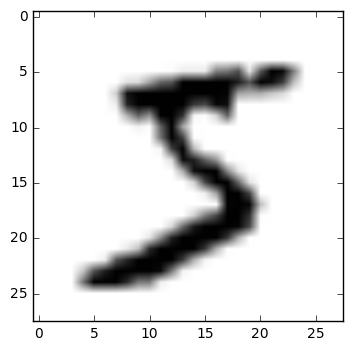

In [24]:
img = train_input[0,:].reshape(28, 28)
plt.imshow(img, cmap=plt.cm.gray_r)

And the correct classification for this image, according to the data set is:

In [25]:
print train_output[0]

5


Notice that the correct output isn't in the format that we need, so we will need to convert the integer output values into a vector
of 10 binary results, with the correct class set to 1 and all others to 0, when we do our training.


Cost Function
-------------

Before we can talk about how to train our network, we need to be able to quantify how well our network is at achieving our goal.
Our goal here is of course to correctly recognize and classify all of the handwritten digits.  We want to find weights and
biases of our network so that the output from the network approximates the expected output $y(x)$ for all
training/test inputs $x$.  To quantify this precisely in machine learning, we use what is known as a cost function:

$\displaystyle C(w, b) \equiv \frac{1}{2n} \sum_x \| y(x) - a \|^2$

Here $w$ and $b$ denote the current weights and biases of the network, and $n$ is the total number of training/testing inputs
we are calculating our cost function over.  For each training input, we subtract the actual output we get from our network
$a$ from the expected/correct outpur $y(x)$.  The notation $\| v \|$ simply denotes the length function for a vector $v$, so 
in essence, we are calculating the distance from the network output to the correct output (the closer the distance, the better
the performance, a distance of 0 means the network got the output exactly correct).  We square this distance because the
distance can be negative, and we don't want the errors the network is making to cancel each other out (we need the total magnitude
of all the errors).  This way of calculating the cost function is very common in machine learning.  It is also sometimes known
as the *mean sum squared error* or just *MSE*, since we are squaring the indivual errors and averaging them by summing up and
dividing by $n$.

Lets give a quick example of how the cost function function works in practice.  If we create a randomly
generated network, and want to try it on the $50,000$ patterns in the training data, we have
to do the following to calculate the cost function:

In [26]:
# create a network with randomly initialized weight and biases
# with 768 units in input layer, 15 in hidden layer, and 10 in output layer
w_hidden = np.random.randn(784, 15) # create a set of weights, normally distributed between inputs and hidden
b_hidden = np.random.randn(15) # create a set of biases for our hidden units
w_output = np.random.randn(15, 10) # create a set of weights, normally distributed between inputs and hidden
b_output = np.random.randn(10) # create a set of biases for our hidden units
weights = [w_hidden, w_output]
biases = [b_hidden, b_output]

# an example of an output from our network for one of the inputs, and the expected output
# for this given input
image_no = 25
input = train_input[image_no,:]
print input.shape
a = feedforward(input, weights, biases)

# in order to calculate our cost function, we need to transform the output class into
# a vector of shape (10,) whose values are all 0 except the class
y = np.zeros((10,))
y[train_output[image_no]] = 1.0
print a
print y

# now w can calculate the cost function for a single pattern between a and y like this
# the norm of a vector is the function to calculate the length of a vector
cost = np.linalg.norm(y - a)**2.0
print cost

# putting this together, we might like to have 2 functions at this point, first we
# will create a set of the vector expected outputs from the output classes like this
def generate_output_vectors(output):
    """Generate an expected output vector for each output class in the given output parameter.
    We expect output to be a vector of (N,) classes, and we will return a matrix of (N,10)
    output vectors"""
    N = output.shape[0] # number of output classes given
    output_vectors = np.zeros((N,10))
    for i, c in enumerate(output):
        output_vectors[i, c] = 1.0
    return output_vectors

expected_output = generate_output_vectors(train_output)
print expected_output.shape
print expected_output[:5,:]

# now we need a function that will take a matrix of the actual outputs from our network
# and the expected outputs, and generate the MSE cost function
def cost_function(y, a):
    """Calculate the cost function (the mean squared error) between the expected output
    y, and the actual output a.  Both y and a are (N, 10) shaped matrices, giving the
    output for N patterns in our MNIST task network with 10 outputs"""
    n = y.shape[0] # number of patterns in y and a
    s = np.sum( np.linalg.norm(y - a, axis=1)**2.0 )
    return s / (2.0 * n)

# now we can use our feedforward method to calculate the actual outputs for all the inputs
outputs = np.zeros(expected_output.shape) # create empty array to hold all the outputs
for pat_num, input in enumerate(train_input):
    input = train_input[pat_num, :]
    outputs[pat_num] = feedforward(input, weights, biases)

print outputs.shape
print outputs[:5,:]

# finally will all of the above work, we can actually calculate our definitive 
# cost function for our currently randomly generated network
c = cost_function(expected_output, outputs)
print "Cost was: ", c

(784,)
[ 0.47457406  0.04654093  0.66076656  0.54140916  0.93050046  0.08709661
  0.02132945  0.67215937  0.06618601  0.7382977 ]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
2.51072396654
(50000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
(50000, 10)
[[ 0.93399746  0.10172847  0.96295856  0.02572593  0.60152623  0.10837262
   0.0794123   0.92443551  0.11050023  0.83439482]
 [ 0.85636599  0.3456763   0.85998062  0.04326367  0.69572901  0.10442021
   0.1175012   0.99658303  0.02269296  0.43599576]
 [ 0.95299149  0.22644289  0.55190042  0.24766948  0.92691492  0.0774923
   0.23580687  0.69327433  0.25149523  0.90033789]
 [ 0.5717342   0.43674827  0.58095597  0.30166199  0.90709679  0.03141136
   0.00711137  0.93243079  0.20067264  0.83109124]
 [ 0.51902538  0.04052262  0.70832955  0.43487664  0.98631489  0.01699339
 

Gradient Descent
-----------------

Given we have some cost or objective function, what should be our goal now.  Well as we already 
mentioned, when the network is giving perfect output for all of the input patterns, we would end up
with a cost function of 0, since all of the actual outputs would be exactly the same as the expected
outputs.  The more differences between the actual and expected outputs our network has, the larger
the cost function will be.  Thus we would like to find a set of weights that will minimize the
cost function, e.g. make it as close to 0 as possible.

There are known techniques for trying to find the location of the maximum or minimum of a function.  For
simple systems this can be done analytically, by finding the locations where the derivative of the
function is 0 (these will be maximum or minimum points).  For more complex functions, and we can
view our very high-dimensional weight/bias network as a very complex function, we cannot do this
analytically.  However there are known techniques to try and search within the function to find
parameters that optimize the output towards the minimum we desire.  

One such tedchniques is known as *gradient descent*.  Intiutively the way gradient descent works is to
analyze the rate of change of the function in the local area given the current set of weights and biases.
If we can determine in which direction we need to go in order to minimize our overall cost function, then
we can modify our parameters (the network weights and biases in this case) so that we move in this 
direction of decreasing cost.

As discussed in the textbook, if we are working in a system of only 2 parameters (think of $v_1$ and 
$v_2$ as weights or biases we are trying to minimize here), we can visualze this as a 3 dimensional
system, with our two parameters as 2 dimensions, and the cost function for each combination of parameter
making up the third.

<img src="files/figures/gradient-descent-2d.png">

The author makes the claim that:

$\Delta C \approx \frac{\partial C}{\partial v_1} \Delta v_1 + \frac{\partial C}{\partial v_2} \Delta v_2$

As the author says, if you're not too comfortable with partial derivatives don't be too woried.  For
me, when I see a partial derivative, it basically means to ignore all of the other dimensions
(keep them constant) and simply think about what happens for the function only in terms of changing
this particular parameter.  For example, imagine we don't change $v_2$ at all (in which case
$\delta v_2$ will be 0.  Then the change in the cost function $C$ will be approximately equal
to how much we change $v_1$ ($\Delta v_1$). But the rate of this change is affected by the rate of
change of our function with respect to the $v_1$ variable ($\frac{\partial C}{\partial v_1}$).  In particular, the partial derivative can tell us which direction the local dimension slopes, so that
we can determine which way we should change $v_1$ so that we are going down the slope rather than
up the slope (if we are trying to minimize our cost function).  One way to imagine the partial
derivative, looking back at the previous figure, is to imagine that $v_2$ does not change, now
find the 2 dimensional plane for the current value of $v_2$ and imagine how the slope/function of
$v_1$ looks in relation to our cost function $C$.

As I said, don't worrry too much if you don't follow this completely.  The partial derivative is a
tool that will allow us to find good ways of choosing changes in $\Delta v_1$ and $\Delta v_2$ so as
to make $\Delta C$ negative, i.e. we'll chose them so that the ball is rolling down into
the valley, hopefully towards the minimum cost function we can achieve.

We can use the previous equation of the approximate value of the change in our cost function as
a function of the changes in our parameters to determine what values we should change the $v$ parameters
by in order to fall down the gradient towards the minimum.  The following equations sums up
this idea at a very high level:

$v \rightarrow v' = v - \eta \triangledown C$

$\eta$ is a learning rate parameter, this needs to be determined carefully (and can be an art as
much as a science, too small or too big learning rates cause strange results).  But in general
all this equation says is that we pick slight changes to our $v$ set of parameters (weights and
biases) so that we go in the opposite direction of the positive gradient (e.g. fall down the
gradient, represent by the $\triangledown C$ part of the equation).  Another way to think of this
is that we want choose the change in each of our $v$ parameters like this:

$\Delta v = -\eta \triangledown C$

This says that we multiple the negative of the learning rate times each of the gradients (each rate
of change for each dimension with respect to the cost function $C$), to determine how much to change
each of our $v$ parameters.  You can think of these two final equations as *defining* the gradient
descent algorithm.  It gives us a way of repeatedly changing the postion of $v$ in order to try and
move toward a minimum of the function $C$.

We can write out the gradient descent update rule in term of the individual components, or weights
and biases, in our network.  Writing out the gradient descent rule in terms of individual 
components, we have:

$w_k \rightarrow w'_k = w_k - \eta \frac{\partial C}{\partial w_k}$

$b_l \rightarrow b'_l = b_l - \eta \frac{\partial C}{\partial b_l}$

This simplye means that to determine the amount to change each weight, we first need to know the
derivative of the fucntion for each component with respect to the cost function.  This will be
either positive or negative, telling us the shape of the local slope.  We take some fraction of
this slope (the learning rate $\eta$ is a ratio much less than 1), and negate it.  This means that
if the slope is positive, we subtract a bit from the current weight in order to move down the
gradient, and if the slope is negative we will add a bit to the current weight in order to move
down the gradient.

To sum up, the most important thing to understand about gradient descent, and so called
minimization/maximization problems, is that the way these algorithms work is to repeatedly
compute the gradient $\triangledown C$, and then to move in the *opposite* direction, 
"falling down" the slope of the valley.  Minimization techniques like this are known as 
hill climbing techniques, or in the case of minimization, valley falling techniques.  And
if we are using functions that we can easily calculate gradients for, at least with respect
to individual dimensions of our function at a time, then we can use such hill climbining 
techniques.  Gradient descent and hill climbing techniques are iterative approaches by nature.
It is usually difficult, if not impossible, to analytically compute the global minimum or
maximum for the function we are looking at.  So instead we simply follow the gradient down (or up)
in small increments.  As long as our increments are small enough, and the landscape of the
energy function we are working with is relatively smooth (smoother than our learning deltas), then
we should be able to follow the gradients down to at least a local minimum.  Later we will think
more about more complicated cost functions, which can have lots of local minima making them harder to
explore to find good solutions.

Applying Gradient Descent to Learn in Neural Networks
------------------------------------------------------

The idea is to find weights $w_k$ and biases $b_l$ which minimize the cost equation we will use (normally the sum squared error
function we discussed).  Writing out the gradient descent update rule in terms of our neural network weights and biases, we
have:

$w_k \rightarrow w'_k = w_k - \eta \frac{\partial C}{\partial w_k}$

$b_l \rightarrow b'_l = b_l - \eta \frac{\partial C}{\partial b_l}$

In words, the new value of the weights (or biases) is found by subtracting the current value of the weights from a learning rate 
multiplied by the gradient of the cost function with respect to the weight (or bias) feature.  By repeatedly applying this
update rule, we can "roll down the hill" and hopefully find a minimum of the cost function.

Training Set Selection
-----------------------

The cost function we previously looked at has the form:

$\displaystyle C(w, b) \equiv \frac{1}{2n} \sum_x \| y(x) - a \|^2$

That is, this is an average over the costs of $x$ training examples/patterns where $C_x \equiv \frac{||y(x) - a||^2}{2}$
In practice to compute the gradient we need to compute the gradients separately for each training input $x$ and then
average them.  Unfortunately this can take a long time, and thus learning occurs slowly.

Therefore it is common to use variations where we don't consider all of our $x$ training patterns for every cycle, but only look 
at a few patterns.   This is helpful because it can greatly speed up learning.  The idea is to estimate the gradient over all
the patterns, by just sampling at random from some subset of the training patterns, and just computing the gradient from them.
By averaging over this small sample, we usually can get a good enough approximation to the true gradient, and it is much faster
to process the learning in small batches.  When we use all of the patterns at once, this is known as batch learning.  We can
simply compute the gradients for 1 input training pattern at a time and update the weights at one extreme, this is known as
online learning (or incremental learning).  However, the most common approach is to use small, randomly 
selected batches of training inputs.  This is known as *stochastic gradient descent* learning.

More precisely, we will randomly pick out a small number $m$ of randomly chosen training inputs.  We'll label thest randomly
selected inputs $X_1, X_2, ..., X_m$ and refer to them as a mini-batch.  Provided that our sample size is large enough we
expect that the average value of the gradients we compute will be roughly equal to the average over all of the training
patterns, that is:

$\displaystyle \frac{\sum_{j=1}^{m} \triangledown C_{X_j}}{m} \approx \frac{\sum_x \triangledown C_x}{n} = \triangledown C$

Where the second sum is over the entire set of training data $x$, and the first one is only over the randomly selected
subset of size $m$.  This means we can approximate the gradient using the subset:

$\displaystyle \triangledown C \approx \frac{1}{m} \sum_{j=1}^{m} \triangledown C_{X_j}$

For a neural network, this simply means that if we want to perform stochastic gradient descent, then we will pick out 
a mini-batch of training inputs from all of the training examples, and compute the new $w_k$ and $b_l$ weights
and biases just using the gradient calculation for that subsample of training inputs.

One note, the normal way to do a mini-batch is that we first pick out $m$ random training examples and train with
those.  Then we select out the next set of $m$ from those that have not yet been selected, and train with that batch,
etc.  We do this until we've exhausted all of the training inputs, which is said to complete a single *epoch* of training.
At that point we start over with a new training epoch.  Another note, the Python random() libraries make it easy to
do this, as they have methods to help us select from a set of items without replacement, and keep selecting untill
all items have been choosen 1 time, to complete an epoch of training.


Putting it Together: Implementing a Network to Classify Digits
--------------------------------------------------------------

A program (from our textbook) to recognize handwritten digits from the MNIST.  We use stochastic gradient descent
for learning.

We use a class to define a Network.  A Network object keeps track of a number of layers for a network.  For eacy layer, we
specify the number of units in that layer when we create the network.  Each layer
in the network consists of a matrix of weights, and a vector of biases, represented as NumPy arrays.  The
constructor for this in Python is simply:

In [27]:
class Network():
    
    def __init__(self, sizes):
        """Construct a Network
        
        sizes - A tuple, giving the number of units in each layer of the network.  For 
        example (3, 4, 3)will create a 3 layer network, with 3 units in the input layer, 
        4 in the hidden layer, and 3 units
           in the output layer.
        """
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x,y in zip(sizes[:-1], sizes[1:])]
        

In [28]:
net = Network( (3, 4, 3) )
print net.num_layers
print net.sizes
print type(net.biases)
print len(net.biases)
print net.biases[1]

3
(3, 4, 3)
<type 'list'>
2
[[-1.2598299 ]
 [ 0.15175419]
 [ 0.42875502]]


In [29]:
sizes = (3, 4, 3)
for x,y in zip(sizes[:-1], sizes[1:]):
    print x,y

3 4
4 3


In [30]:
input_to_hidden = net.weights[1]
print type(input_to_hidden)
print input_to_hidden.shape
print input_to_hidden

<type 'numpy.ndarray'>
(3, 4)
[[ 0.8528326  -0.14452563 -0.6126545  -0.2122617 ]
 [-0.6767035   0.98748788 -1.97732348 -0.63267837]
 [ 0.31323557 -0.23553707  0.27387452 -0.82484599]]


We showed an example of how to create a Network object.  This network object assumes that the first layer of units is an
input layer, and omits biases for those units.  Notice also that the biases and weights between each layer are initialized to
random values with mean 0 and standard deviation 1.  This random initializaiton gives the stochastic gradient descent
algorithm a starting place to work from.  Weights and biases are stored as simple Python lists of numpy arrays.  Each 
item in each lists are corresponding weights and biases between two layers in the network.  For example, `net.weights[0]` and
`net.biases[0]` are the wieghts between layers 0 and 1 (input and hidden), an the biases for the hidden units.

Given this representation, as we have done before, we can easily compute the forward activation of the network for units
with some activation function.  As before, we define a simple `sigmoid` activation function.  And we add a feedforward
method to our network class, that given a vector of inputs `a` returns the output of the network by feeding forward
the activation through all of the layers of the network:

In [31]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

class Network():
    
    def __init__(self, sizes):
        """Construct a Network
        
        sizes - A tuple, giving the number of units in each layer of the network.  
        For example (3, 4, 3)
           will create a 3 layer network, with 3 units in the input layer, 4 
           in the hidden layer, and 3 units
           in the output layer.
        """
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x,y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, a):
        """Return the output of the network if "a" is the input.  
        
        a - A vector of input values.  a must be the correct size, the same size as 
        the number of units in the 
            input layer of our network
        """
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a    
        

In [32]:
net = Network( (3, 10, 10, 10, 5) )
a = np.array([1.0, 0.5, -0.5])
out = net.feedforward(a)
print out

[ 0.03060184  0.29315343  0.99165834  0.48786467  0.42464398]


The main thing we want the network to do is learn.  Here is the *stochastic gradient descent* routine for our network object,
implemented in Python:

In [33]:
"""
network.py
~~~~~~~~~~

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network():

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid_vec(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        train_costs = []
        train_accuricies = []
        test_costs = []
        test_accuricies = []
        n = len(training_data)
        if test_data: 
            # find cost/accuracy at epoch 0, before training begins
            n_test = len(test_data)
            train_cost = self.cost(training_data)
            test_cost = self.cost(test_data)
            num_correct = self.evaluate(training_data)
            train_accuracy = float(num_correct) / float(n)
            num_correct = self.evaluate(test_data)
            test_accuracy = float(num_correct) / float(n_test)
            train_costs.append(train_cost)
            train_accuricies.append(train_accuracy)
            test_costs.append(test_cost)
            test_accuricies.append(test_accuracy)

        for j in xrange(1,epochs+1):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                train_cost = self.cost(training_data)
                test_cost = self.cost(test_data)
                num_correct = self.evaluate(training_data)
                train_accuracy = float(num_correct) / float(n)
                num_correct = self.evaluate(test_data)
                test_accuracy = float(num_correct) / float(n_test)
                train_costs.append(train_cost)
                train_accuricies.append(train_accuracy)
                test_costs.append(test_cost)
                test_accuricies.append(test_accuracy)
                print "Epoch {0}: {1} / {2}: {3} train cost, {4} test cost, {5} train accuracy, {6} test accuracy".format(
                    j, num_correct, n_test, train_cost, test_cost, train_accuracy, test_accuracy
                )
            else:
                print "Epoch {0} complete".format(j)
                
        return (train_costs, train_accuricies, test_costs, test_accuricies)
            
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid_vec(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime_vec(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            spv = sigmoid_prime_vec(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * spv
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), np.argmax(y)) 
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
    
    def cost(self, data):
        """Evaluate the cost or loss function for the current set of weights
        on the given data.
        """
        input_costs = [np.linalg.norm(y - self.feedforward(x))**2 for(x, y) in data] 
        return np.sum(input_costs) / (2.0 * len(input_costs)) 
    
    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y) 

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

sigmoid_vec = np.vectorize(sigmoid)

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

sigmoid_prime_vec = np.vectorize(sigmoid_prime)

In [34]:
import cPickle, gzip

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_results = [vectorized_result(y) for y in te_d[1]]
    test_data = zip(test_inputs, test_results)
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [35]:
# load the data using the previous helper functions
training_data, validation_data, test_data = load_data_wrapper()

In [36]:
print len(training_data)
print type(training_data)
print type(training_data[0])
X, y = training_data[0]
print type(X)
print X.shape
print type(y)
print y.shape
print y

print len(test_data)
X, y = test_data[0]
print type(y)
print y

50000
<type 'list'>
<type 'tuple'>
<type 'numpy.ndarray'>
(784, 1)
<type 'numpy.ndarray'>
(10, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
10000
<type 'numpy.ndarray'>
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]


In [51]:
def display_learning_performance(train_costs, train_accuracy, test_costs, test_accuracy):
    """Helper function to display cost/loss curves and accuracy results for train/test data set
    performance for a learning session"""
    beg = 1
    end = len(train_costs)
    fig = plt.figure(figsize=(10,8))
    epochs = np.arange(0, end)
    
    plt.subplot(2,1,1)
    plt.plot(epochs[beg:end], train_costs[beg:end], 'k-', label='train cost')
    plt.plot(epochs[beg:end], test_costs[beg:end], 'k--', label='test cost')
    plt.xlabel('training epoch')
    plt.ylabel('cost')
    plt.legend(loc='upper right')
    
    plt.subplot(2,1,2)
    plt.plot(epochs[beg:end], train_accuracy[beg:end], 'k-', label='train accuracy')
    plt.plot(epochs[beg:end], test_accuracy[beg:end], 'k--', label='test accuracy')
    plt.xlabel('training epoch')
    plt.ylabel('accuracy (ratio)')
    plt.legend(loc='lower right')


In [37]:
# train a network 30 hidden units
net1 = Network( (784, 30, 10) )
(train_costs, train_accuracy, test_costs, test_accuracy) = \
    net1.SGD(training_data, 30, 10, 1.0, test_data=test_data)

Epoch 1: 8731 / 10000: 0.111401817824 train cost, 0.105119977962 test cost, 0.86292 train accuracy, 0.8731 test accuracy
Epoch 2: 9038 / 10000: 0.0816488436616 train cost, 0.0797845218228 test cost, 0.90106 train accuracy, 0.9038 test accuracy
Epoch 3: 9142 / 10000: 0.0688994211525 train cost, 0.0692164175981 test cost, 0.91604 train accuracy, 0.9142 test accuracy
Epoch 4: 9208 / 10000: 0.0619643252976 train cost, 0.0644220492739 test cost, 0.92526 train accuracy, 0.9208 test accuracy
Epoch 5: 9263 / 10000: 0.0567350114836 train cost, 0.0606838169109 test cost, 0.93128 train accuracy, 0.9263 test accuracy
Epoch 6: 9286 / 10000: 0.0537639144293 train cost, 0.0580279707134 test cost, 0.9353 train accuracy, 0.9286 test accuracy
Epoch 7: 9319 / 10000: 0.0504347139195 train cost, 0.0553181888922 test cost, 0.93834 train accuracy, 0.9319 test accuracy
Epoch 8: 9312 / 10000: 0.0475334980714 train cost, 0.0540358584414 test cost, 0.94318 train accuracy, 0.9312 test accuracy
Epoch 9: 9350 / 100

0.08636 0.0909


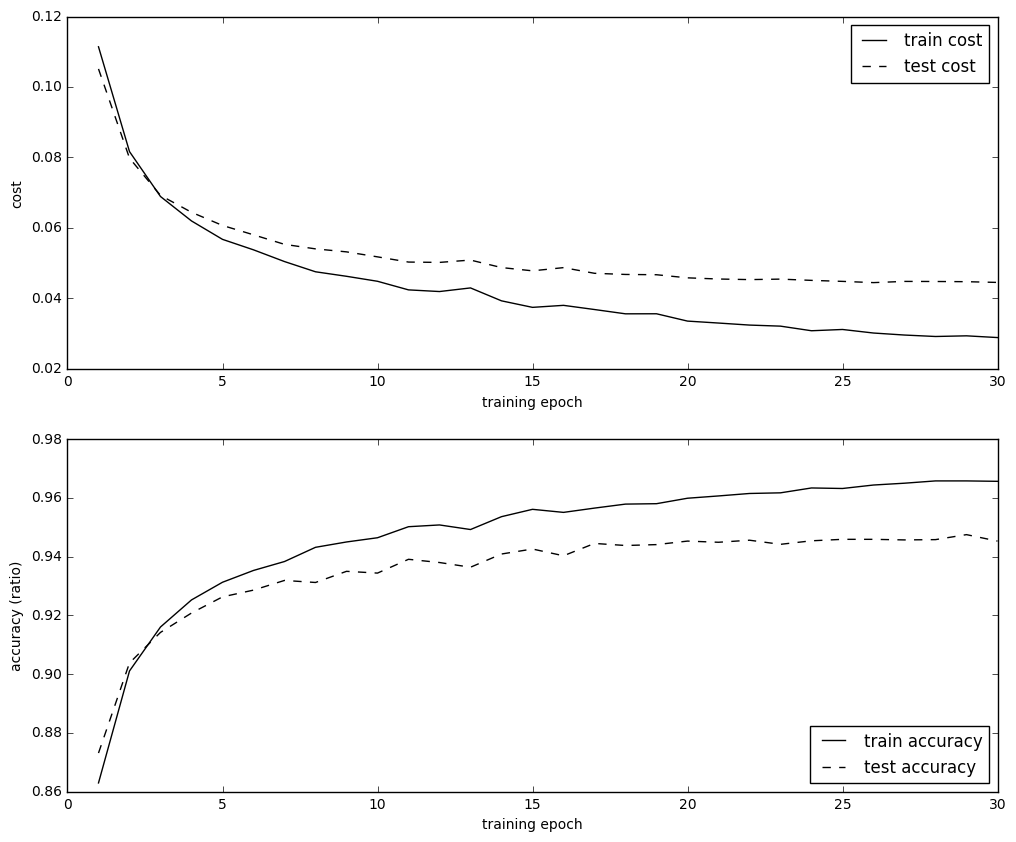

In [48]:
display_learning_performance(train_costs, train_accuracy, test_costs, test_accuracy)

In [50]:
# train a network 100 hidden units
net2 = Network( (784, 100, 10) )
(train_costs, train_accuracy, test_costs, test_accuracy) = \
    net2.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 1: 5503 / 10000: 0.263666531462 train cost, 0.269070898741 test cost, 0.55614 train accuracy, 0.5503 test accuracy
Epoch 2: 6534 / 10000: 0.195762931479 train cost, 0.197775779582 test cost, 0.65502 train accuracy, 0.6534 test accuracy
Epoch 3: 6552 / 10000: 0.19184451631 train cost, 0.197704823445 test cost, 0.65982 train accuracy, 0.6552 test accuracy
Epoch 4: 6608 / 10000: 0.182684848185 train cost, 0.189835857542 test cost, 0.66642 train accuracy, 0.6608 test accuracy
Epoch 5: 6618 / 10000: 0.177952465949 train cost, 0.187277473425 test cost, 0.67012 train accuracy, 0.6618 test accuracy
Epoch 6: 6619 / 10000: 0.176504703913 train cost, 0.18558781526 test cost, 0.671 train accuracy, 0.6619 test accuracy
Epoch 7: 6641 / 10000: 0.174247791533 train cost, 0.184367708719 test cost, 0.67312 train accuracy, 0.6641 test accuracy
Epoch 8: 6660 / 10000: 0.171451815672 train cost, 0.182993603207 test cost, 0.6752 train accuracy, 0.666 test accuracy
Epoch 9: 6648 / 10000: 0.170361344306 

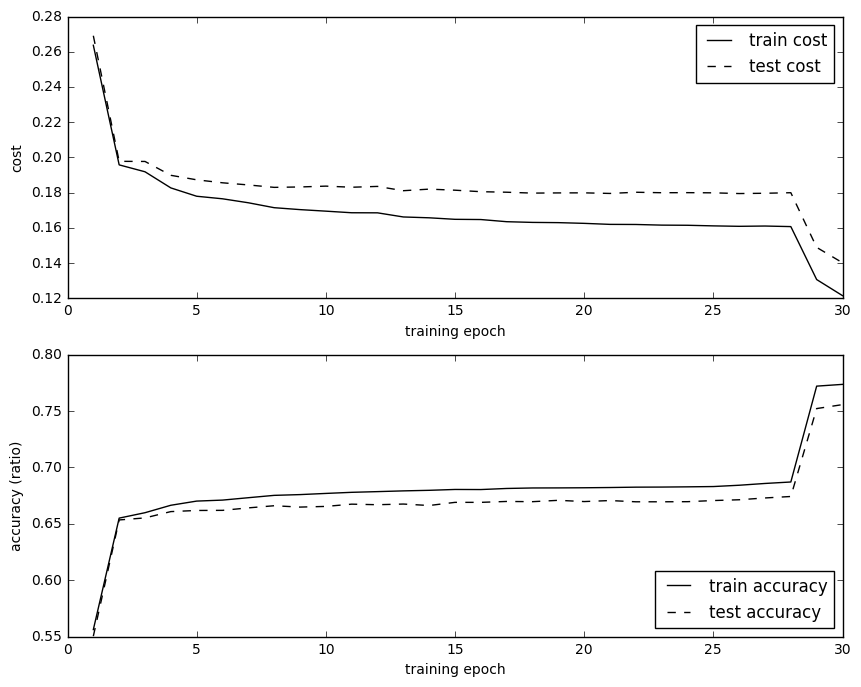

In [52]:
display_learning_performance(train_costs, train_accuracy, test_costs, test_accuracy)

In [53]:
# train a network with only 2 layers (Exercise) 
net3 = Network( (784, 10) )
(train_costs, train_accuracy, test_costs, test_accuracy) = \
    net3.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 1: 5318 / 10000: 0.303361834948 train cost, 0.298802875967 test cost, 0.53068 train accuracy, 0.5318 test accuracy
Epoch 2: 6412 / 10000: 0.224945317028 train cost, 0.223493917187 test cost, 0.64128 train accuracy, 0.6412 test accuracy
Epoch 3: 7411 / 10000: 0.171305504892 train cost, 0.170118417076 test cost, 0.73968 train accuracy, 0.7411 test accuracy
Epoch 4: 7446 / 10000: 0.16431731386 train cost, 0.165355050725 test cost, 0.74534 train accuracy, 0.7446 test accuracy
Epoch 5: 7447 / 10000: 0.165814583177 train cost, 0.167036922031 test cost, 0.74548 train accuracy, 0.7447 test accuracy
Epoch 6: 7453 / 10000: 0.161575021339 train cost, 0.164281943561 test cost, 0.74746 train accuracy, 0.7453 test accuracy
Epoch 7: 7460 / 10000: 0.158763232102 train cost, 0.162924313535 test cost, 0.74884 train accuracy, 0.746 test accuracy
Epoch 8: 7432 / 10000: 0.159069304342 train cost, 0.164157961168 test cost, 0.7478 train accuracy, 0.7432 test accuracy
Epoch 9: 7497 / 10000: 0.1567614712

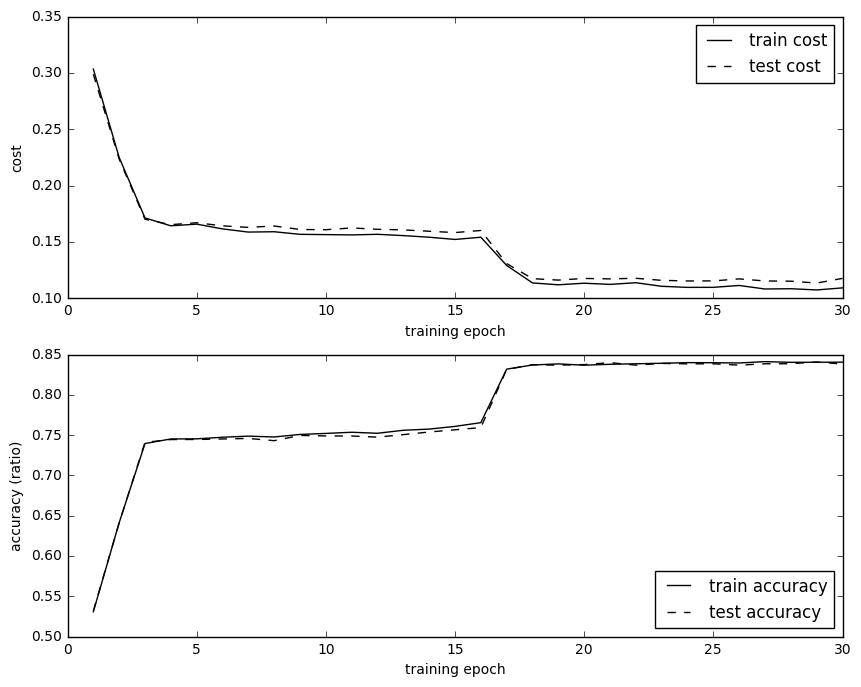

In [54]:
display_learning_performance(train_costs, train_accuracy, test_costs, test_accuracy)

In [55]:
# train a network with 2 hidden layers, 30 units in each layer
net4 = Network( (784, 30, 30, 10) )
(train_costs, train_accuracy, test_costs, test_accuracy) = \
    net4.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 1: 9035 / 10000: 0.0737465994336 train cost, 0.0724128090196 test cost, 0.90666 train accuracy, 0.9035 test accuracy
Epoch 2: 9254 / 10000: 0.0584307869754 train cost, 0.0592737891316 test cost, 0.92692 train accuracy, 0.9254 test accuracy
Epoch 3: 9338 / 10000: 0.0504947843155 train cost, 0.0536696969915 test cost, 0.9374 train accuracy, 0.9338 test accuracy
Epoch 4: 9364 / 10000: 0.0461306699272 train cost, 0.0530350436161 test cost, 0.9434 train accuracy, 0.9364 test accuracy
Epoch 5: 9412 / 10000: 0.0408309602317 train cost, 0.0468954219355 test cost, 0.94892 train accuracy, 0.9412 test accuracy
Epoch 6: 9395 / 10000: 0.0413045614255 train cost, 0.0485025440711 test cost, 0.94852 train accuracy, 0.9395 test accuracy
Epoch 7: 9408 / 10000: 0.0396560192938 train cost, 0.0487913009653 test cost, 0.9526 train accuracy, 0.9408 test accuracy
Epoch 8: 9422 / 10000: 0.0374228582533 train cost, 0.0463811398329 test cost, 0.95506 train accuracy, 0.9422 test accuracy
Epoch 9: 9432 / 100

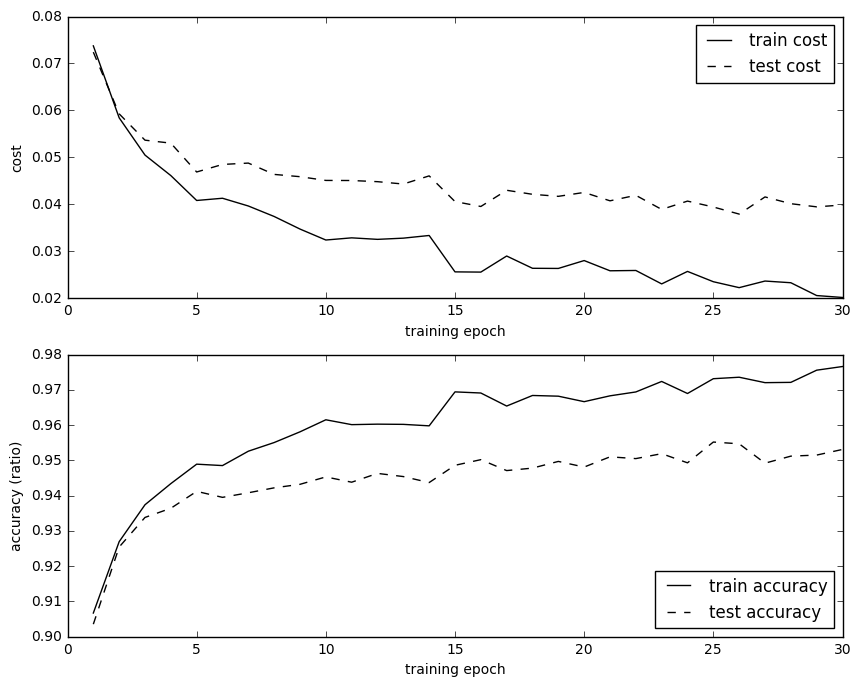

In [56]:
display_learning_performance(train_costs, train_accuracy, test_costs, test_accuracy)

# Example of Classifying a New Image


In [73]:
# need opencv2 to read in image
# by default, reading in as IMREAD_GRAYSCALE will read as unsigned 8 bit values
import cv2

#img_path = 'data/new-mnist-images/derek-image-3.png'
img_path = 'data/new-mnist-images/derek-image-6.png' # some other images to try
#img_path = 'data/new-mnist-images/derek-image-8.png' # some other images to try

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = (255 - img) # invert black/white, because reversed for some reason in the color png from what we want
img = img.astype(float) / 255.0 # recast into values from 0.0 to 1.0

print type(img)
print img.shape
print img.dtype

<type 'numpy.ndarray'>
(900, 900)
float64


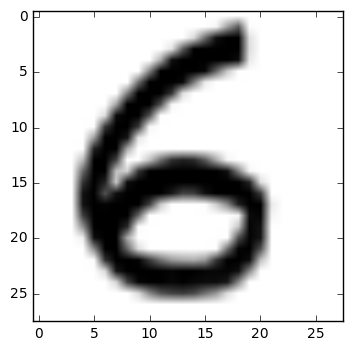

In [74]:
# resize image to desired shape
IMAGE_WIDTH=28
IMAGE_HEIGHT=28

img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT), interpolation=cv2.INTER_AREA)
#img = cv2.inRange(img, 0.0, 1.0)
plt.imshow(img, cmap=plt.cm.gray_r)


In [75]:
# feed image in, get the 10 activations
np.set_printoptions(precision=4, suppress=True)
a = net1.feedforward(img.reshape(784,1))

# the raw activations, we can interpret kind of as probabilities that image is of each type
print a

# use argmax trick, get index of highest value, will tell which integer our network is outputting
print np.argmax(a)

[[ 0.0011]
 [ 0.    ]
 [ 0.0037]
 [ 0.0001]
 [ 0.0001]
 [ 0.8383]
 [ 0.0004]
 [ 0.    ]
 [ 0.032 ]
 [ 0.    ]]
5


In [82]:
# I'm getting weird results for my 6 image, are the networks not doing very well on 6's, or any
# particular digit for some reason?

# evaluate accuracy, but keep track of accuracy for each digit class
accuracy = np.zeros(10) # hold final accuracy results for each digit, 0-9
test_results = [(np.argmax(net1.feedforward(x)), np.argmax(y)) for (x, y) in test_data]
for digit in range(10):
    num_inputs = 0
    num_correct = 0
    for (x, y) in test_results:
        if y == digit:
            num_inputs += 1
            if x == y:
                num_correct += 1
    accuracy[digit] = float(num_correct) / float(num_inputs)
    #print "digit %d: num_correct %d, num_inputs %d, accuracy %0.4f" % (digit, num_correct, num_inputs, accuracy[digit])
    
for digit in range(10):
    print "digit %d: accuracy = %f" % (digit, accuracy[digit])
    

digit 0: num_correct 956, num_inputs 980, accuracy 0.9755
digit 1: num_correct 1113, num_inputs 1135, accuracy 0.9806
digit 2: num_correct 958, num_inputs 1032, accuracy 0.9283
digit 3: num_correct 955, num_inputs 1010, accuracy 0.9455
digit 4: num_correct 916, num_inputs 982, accuracy 0.9328
digit 5: num_correct 799, num_inputs 892, accuracy 0.8957
digit 6: num_correct 920, num_inputs 958, accuracy 0.9603
digit 7: num_correct 963, num_inputs 1028, accuracy 0.9368
digit 8: num_correct 929, num_inputs 974, accuracy 0.9538
digit 9: num_correct 944, num_inputs 1009, accuracy 0.9356
digit 0: accuracy = 0.975510
digit 1: accuracy = 0.980617
digit 2: accuracy = 0.928295
digit 3: accuracy = 0.945545
digit 4: accuracy = 0.932790
digit 5: accuracy = 0.895740
digit 6: accuracy = 0.960334
digit 7: accuracy = 0.936770
digit 8: accuracy = 0.953799
digit 9: accuracy = 0.935580


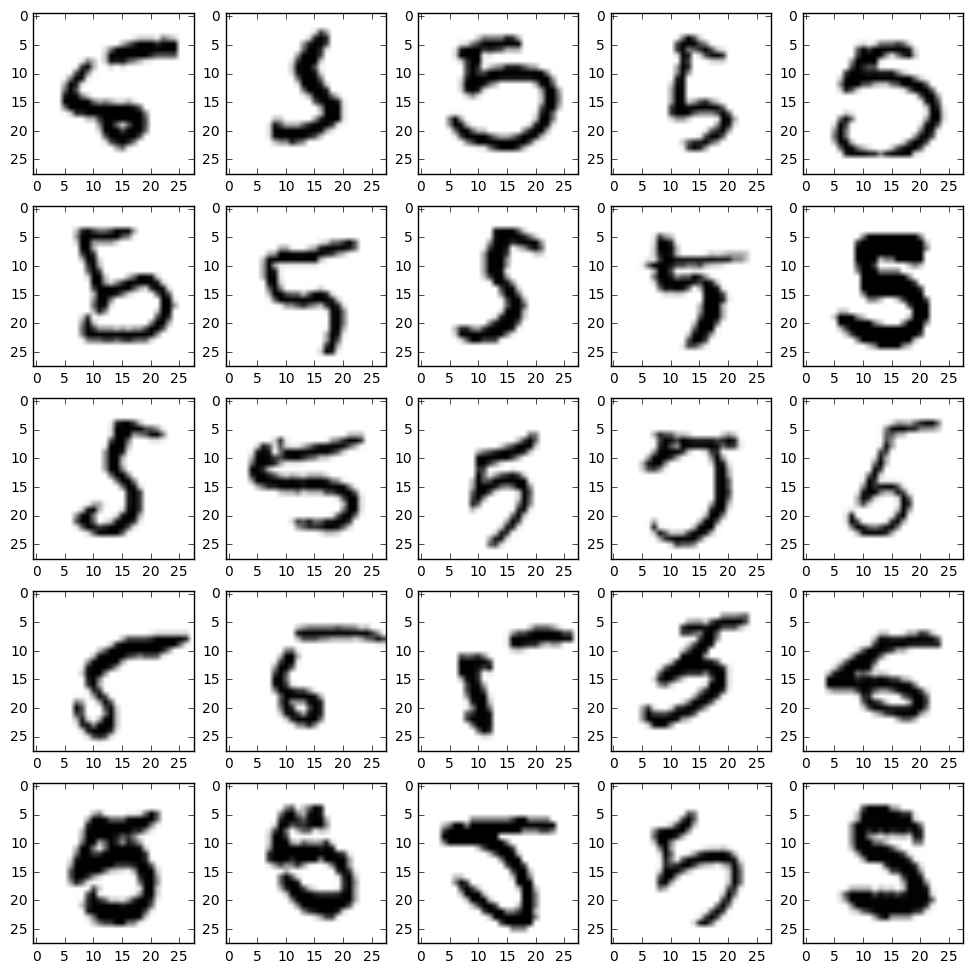

In [85]:
# lets show some 5's we were not getting correct
plt.figure(figsize=(12,12))
NUM_TO_DISPLAY = 25
num_displayed = 1
idx = 0
test_results = [(np.argmax(net1.feedforward(x)), np.argmax(y)) for (x, y) in test_data]
while num_displayed <= NUM_TO_DISPLAY:
    x, y = test_results[idx]
    if y == 5 and x != y:
        plt.subplot(5,5,num_displayed)
        img = test_data[idx][0].reshape((28,28))
        plt.imshow(img, cmap=plt.cm.gray_r)
        num_displayed += 1
    idx += 1
        

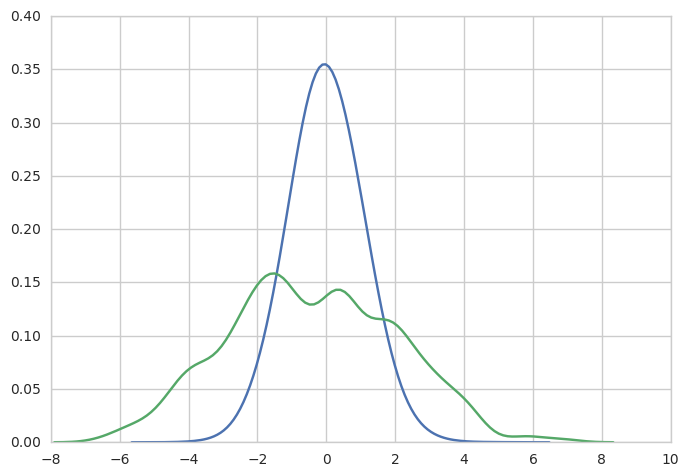

In [90]:
# show distribution of final weights in network 1 (1 hidden layer, 30 hidden units)
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(net1.weights[0].flatten(), bw=0.5) # density plot of weights between input and hidden layer
sns.kdeplot(net1.weights[1].flatten(), bw=0.5) # density plot of weights between hidden and output layer

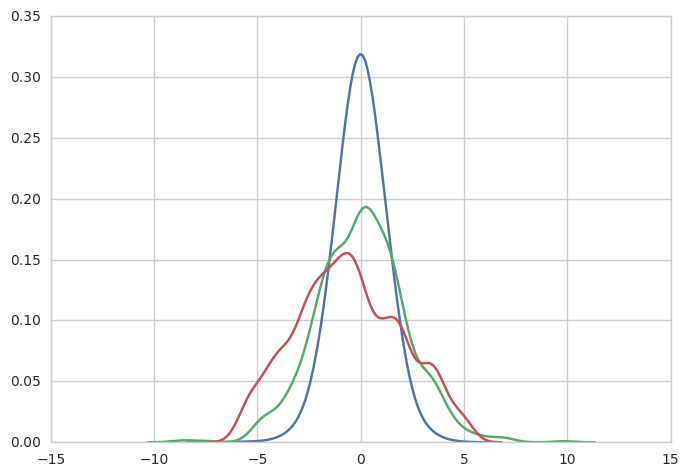

In [92]:
# show distribution of final weights in network 4 (2 hidden layers, 30 hidden units in each)
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(net4.weights[0].flatten(), bw=0.5) # density plot of weights between input and hidden1 layer
sns.kdeplot(net4.weights[1].flatten(), bw=0.5) # density plot of weights between hidden1 and hidden2 layer
sns.kdeplot(net4.weights[2].flatten(), bw=0.5) # density plot of weights between hidden2 and output layer